# Insurance Claim Prediction

## 1. Importing necessary libraries

In [48]:
from random import randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from scipy .stats import shapiro,jarque_bera,kstest,iqr,loguniform
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif,mutual_info_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import f1_score,accuracy_score,classification_report,precision_score,recall_score,roc_auc_score,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
df1=pd.read_csv('./train_qWM28Yl.csv')
copydf1=df1.copy()

## 2.Data Exploration

In [4]:
df1.head(5)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [5]:
df1.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [7]:
for i in range(len(df1.columns)):
    if (df1.iloc[:,i].dtypes == 'object'):
        if(df1.iloc[:,i].nunique()>2):
            print(df1.columns[i], ":", df1.iloc[:,i].nunique())

policy_id : 58592
area_cluster : 22
segment : 6
model : 11
fuel_type : 3
max_torque : 9
max_power : 9
engine_type : 11
steering_type : 3


## 3. Exploratory Data Analysis( EDA)

### The target feature is highly imbalanced from the below pie chart

0    54844
1     3748
Name: is_claim, dtype: int64


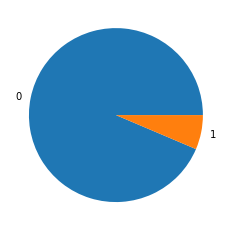

In [8]:
plt.pie(df1['is_claim'].value_counts(),labels=df1['is_claim'].value_counts().index)
print(df1['is_claim'].value_counts())

### After performing the jarque bera stat test the features which aren't following the normal distribution are below

In [9]:
non_normal_features=[]
for i in range(len(df1.columns)):
    if (df1.iloc[:,i].dtypes == 'int64'):
        if (jarque_bera(df1.iloc[:,i])[1]<=0.05):
            print(df1.columns[i])
            non_normal_features.append(df1.columns[i])

population_density
make
airbags
displacement
cylinder
gear_box
length
width
height
gross_weight
ncap_rating
is_claim


### finding the presence of outliers

In [10]:
def outlier_treatment(datacolumn,datacolumnname):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    outlier=len(df1[((datacolumn<(lower_range)) | (datacolumn>(upper_range)))])
    print(datacolumnname,"has",outlier,"outliers")

In [11]:
for i in df1.columns:
    if (df1[i].dtypes=='int64'or df1[i].dtypes=='float64'):
        outlier_treatment(df1[i],i)

policy_tenure has 0 outliers
age_of_car has 269 outliers
age_of_policyholder has 221 outliers
population_density has 3647 outliers
make has 0 outliers
airbags has 0 outliers
displacement has 0 outliers
cylinder has 0 outliers
gear_box has 14381 outliers
turning_radius has 0 outliers
length has 0 outliers
width has 0 outliers
height has 0 outliers
gross_weight has 0 outliers
ncap_rating has 0 outliers
is_claim has 3748 outliers


In [12]:
df1['age_of_car'].value_counts()

0.01    6362
0.00    5257
0.02    5189
0.03    4415
0.04    3763
0.05    3342
0.10    3123
0.06    3053
0.07    2888
0.08    2730
0.09    2643
0.12    2506
0.11    2442
0.13    2315
0.14    2151
0.15    1964
0.16    1291
0.17     931
0.18     738
0.19     458
0.20     287
0.21     172
0.22     148
0.23      90
0.24      65
0.25      46
0.30      32
0.27      29
0.31      26
0.28      25
0.26      24
0.29      21
0.32      13
0.33      12
0.36       8
0.34       6
0.39       5
0.38       4
1.00       3
0.37       3
0.49       2
0.46       2
0.44       2
0.42       1
0.45       1
0.35       1
0.82       1
0.62       1
0.81       1
Name: age_of_car, dtype: int64

In [13]:
df1['age_of_policyholder'].value_counts()

0.375000    1779
0.365385    1766
0.346154    1733
0.355769    1724
0.394231    1715
            ... 
0.961538       2
0.971154       1
0.990385       1
0.980769       1
1.000000       1
Name: age_of_policyholder, Length: 75, dtype: int64

In [14]:
df1['population_density'].value_counts()

8794     13654
27003     7342
34738     6979
4076      6101
7788      3660
5410      3423
73430     3155
17804     2734
6112      2167
34791     1589
4990      1468
6108      1212
27742      952
13051      890
290        771
21622      665
65567      492
16206      401
3264       379
35036      242
16733      207
20905      109
Name: population_density, dtype: int64

<AxesSubplot:xlabel='population_density', ylabel='Density'>

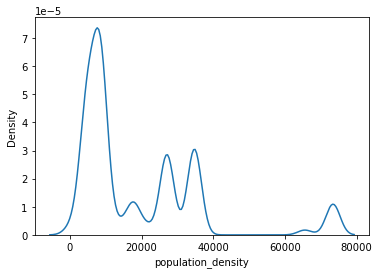

In [15]:
sns.kdeplot(df1['population_density'])

<AxesSubplot:>

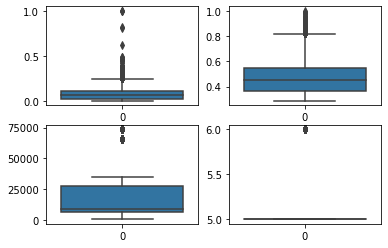

In [16]:
fig,axes=plt.subplots(2,2)
sns.boxplot(data=df1['age_of_car'],ax=axes[0,0])
sns.boxplot(data=df1['age_of_policyholder'],ax=axes[0,1])
sns.boxplot(data=df1['population_density'],ax=axes[1,0])
sns.boxplot(data=df1['gear_box'],ax=axes[1,1])

In [17]:
df1['gear_box'].value_counts()

5    44211
6    14381
Name: gear_box, dtype: int64

<AxesSubplot:xlabel='gear_box', ylabel='Density'>

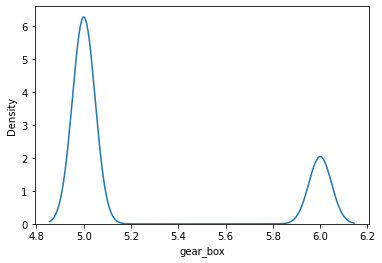

In [18]:
sns.kdeplot(df1['gear_box'])

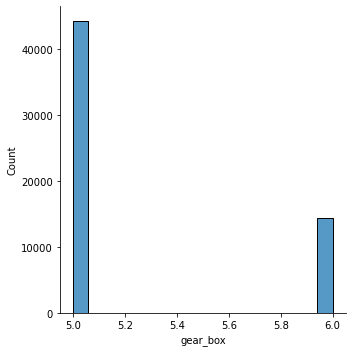

In [19]:
sns.displot(data=df1['gear_box'])

## 4. Data Preprocessing

### Droping ID feature

In [20]:
df1.drop('policy_id',axis=1,inplace=True)

### Converting categorical variables to Numeric

In [21]:
df2 = pd.get_dummies(df1,columns = ['area_cluster', 'segment','model','fuel_type','max_torque','max_power','engine_type','steering_type'])

In [22]:
for i in df2.columns:
    if df2[i].dtypes=='object':
        print(df2[i].value_counts())

No     40191
Yes    18401
Name: is_esc, dtype: int64
Yes    35526
No     23066
Name: is_adjustable_steering, dtype: int64
No     44574
Yes    14018
Name: is_tpms, dtype: int64
Yes    56219
No      2373
Name: is_parking_sensors, dtype: int64
No     35704
Yes    22888
Name: is_parking_camera, dtype: int64
Drum    44574
Disc    14018
Name: rear_brakes_type, dtype: int64
Manual       38181
Automatic    20411
Name: transmission_type, dtype: int64
Yes    33928
No     24664
Name: is_front_fog_lights, dtype: int64
No     41634
Yes    16958
Name: is_rear_window_wiper, dtype: int64
No     41634
Yes    16958
Name: is_rear_window_washer, dtype: int64
No     38077
Yes    20515
Name: is_rear_window_defogger, dtype: int64
Yes    32177
No     26415
Name: is_brake_assist, dtype: int64
Yes    42435
No     16157
Name: is_power_door_locks, dtype: int64
Yes    42435
No     16157
Name: is_central_locking, dtype: int64
Yes    57383
No      1209
Name: is_power_steering, dtype: int64
Yes    34291
No     24301


In [23]:
mapper={'is_esc':{'No':0,'Yes':1},
         'is_adjustable_steering':{'No':0,'Yes':1},
          'is_tpms':{'No':0,'Yes':1},
         'is_parking_sensors':{'No':0,'Yes':1},
         'is_parking_camera':{'No':0,'Yes':1},
         'rear_brakes_type':{'Drum':0,'Disc':1},
         'transmission_type':{'Manual':0,'Automatic':1},
         'is_front_fog_lights':{'No':0,'Yes':1},
        'is_rear_window_wiper':{'No':0,'Yes':1},
         'is_rear_window_washer':{'No':0,'Yes':1},
         'is_rear_window_defogger':{'No':0,'Yes':1},
         'is_brake_assist':{'No':0,'Yes':1},
        'is_power_door_locks':{'No':0,'Yes':1},
         'is_central_locking':{'No':0,'Yes':1},
         'is_power_steering':{'No':0,'Yes':1},
         'is_driver_seat_height_adjustable':{'No':0,'Yes':1},
         'is_day_night_rear_view_mirror':{'No':0,'Yes':1},
         'is_ecw':{'No':0,'Yes':1},
        'is_speed_alert':{'No':0,'Yes':1},
        }

In [24]:
df2=df2.replace(mapper)

In [25]:
#Removal of any Duplicate rows (if any)
counter = 0
r,c = df2.shape

df3 = df2.copy()
df3.drop_duplicates(inplace=True)
df3.reset_index(drop=True,inplace=True)

if df3.shape==(r,c):
    print('The dataset doesn\'t have any duplicates')
else:
    print(f'[Number of duplicates dropped ---> {r-df3.shape[0]}')

The dataset doesn't have any duplicates


In [26]:
#Removal of outlier:

df4 = df2.copy()

for i in [i for i in df4.columns]:
    if df4[i].nunique()>=3:
        print(i)
        Q1 = df4[i].quantile(0.25)
        Q3 = df4[i].quantile(0.75)
        IQR = Q3 - Q1
        df4 = df4[df4[i] <= (Q3+(1.5*IQR))]
        df4 = df4[df4[i] >= (Q1-(1.5*IQR))]
df4 = df4.reset_index(drop=True)
print('[Before removal of outliers, The dataset had {} samples.'.format(df2.shape[0]))
print('[After removal of outliers, The dataset now has {} samples.'.format(df4.shape[0]))

policy_tenure
age_of_car
age_of_policyholder
population_density
make
airbags
displacement
turning_radius
length
width
height
gross_weight
ncap_rating
[Before removal of outliers, The dataset had 58592 samples.
[After removal of outliers, The dataset now has 54480 samples.


## 5. Data Augmentation

In [27]:
#Fixing the imbalance using SMOTE Technique

df5 = df4.copy()

print('Original class distribution:')
print(df5['is_claim'].value_counts())

xf = df5.columns
X = df5.drop('is_claim',axis=1)
Y = df5['is_claim']

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df5 = pd.DataFrame(X, columns=xf)
df5['is_claim'] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
0    50935
1     3545
Name: is_claim, dtype: int64

Class distribution after applying SMOTE Technique:
0    50935
1    50935
Name: is_claim, dtype: int64


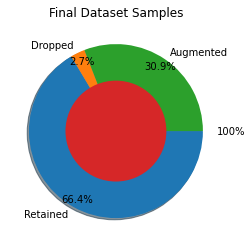

[The final dataset after cleanup has 101870 samples & 109 columns.


In [28]:
#Final Dataset size after performing Preprocessing
df = df5.copy()
plt.title('Final Dataset Samples')
plt.pie([df.shape[0], df1.shape[0]-df4.shape[0], df5.shape[0]-df4.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-2, radius=0.58, shadow=True)
plt.show()

print('[The final dataset after cleanup has {} samples & {} columns.'.format(df.shape[0], df.shape[1]))

## 6. Feature Selection

In [29]:
X = df.drop('is_claim',axis=1)
Y = df['is_claim']
Train_X, Test_X, Train_Y, Test_Y =train_test_split(X,Y,test_size=0.2,random_state=42)

In [30]:
#Feature Scaling (Standardization)

# std = StandardScaler()
# Train_X_std = std.fit_transform(Train_X)
# Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)

# Test_X_std = std.transform(Test_X)
# Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)

In [31]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k=10)
# learn relationship from training data
fs.fit(Train_X, Train_Y)
# transform train input data
X_train_fs = fs.transform(Train_X)
# transform test input data
X_test_fs = fs.transform(Test_X)

In [32]:
f_scores=[]
for i in range(len(fs.scores_)):
    f_scores.append(fs.scores_[i])
f_values1=pd.Series(f_scores)
f_values1.index=Train_X.columns
f_values1.nlargest(10)

policy_tenure                            2406.158395
age_of_car                                343.691041
model_M11                                 105.526208
max_torque_170Nm@4000rpm                  105.526208
max_power_118.36bhp@5500rpm               105.526208
engine_type_1.5 Turbocharged Revotron     105.526208
is_adjustable_steering                     97.358693
age_of_policyholder                        95.675562
area_cluster_C9                            91.205653
cylinder                                   82.157438
dtype: float64

In [33]:
top_features=['policy_tenure','age_of_car','model_M11','age_of_policyholder','is_adjustable_steering','model_M3']

In [34]:
Train_X=Train_X[top_features]
Test_X=Test_X[top_features]

## 7. Model Development

In [53]:
#Building Decision Tree Classifier
DT_model = DecisionTreeClassifier()

param_dist = {"max_depth": [3,4,5,None],
              "max_features": [1,2,3,4,5,6],
              "min_samples_leaf": [i for i in range(1,10)],
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

DT = RCV.fit(Train_X,Train_Y).best_estimator_
pred = DT.predict(Test_X)
print(confusion_matrix(Test_Y,pred))
print(accuracy_score(Test_Y,pred))
print(f1_score(Test_Y,pred))
print(precision_score(Test_Y,pred))
print(recall_score(Test_Y,pred))# In[ ]:

[[9738  557]
 [1243 8836]]
0.9116521056248159
0.9075595727198028
0.9407005216650697
0.876674273241393


In [55]:
# Building Naive Bayes Classifier

NB_model = BernoulliNB()

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(NB_model, params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

NB = RCV.fit(Train_X, Train_Y).best_estimator_
pred = NB.predict(Test_X)
print(confusion_matrix(Test_Y,pred))
print(accuracy_score(Test_Y,pred))
print(f1_score(Test_Y,pred))
print(precision_score(Test_Y,pred))
print(recall_score(Test_Y,pred))

[[3957 6338]
 [3553 6526]]
0.5145283204083636
0.568888114021706
0.5073072139303483
0.6474848695307074


In [56]:
# Building Gradient Boosting Classifier

GB_model = GradientBoostingClassifier().fit(Train_X, Train_Y)
param_dist = {
    "n_estimators":[5,20,100,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

GB = GB_model.fit(Train_X, Train_Y)#.best_estimator_
pred = GB.predict(Test_X)
print(confusion_matrix(Test_Y,pred))
print(accuracy_score(Test_Y,pred))
print(f1_score(Test_Y,pred))
print(precision_score(Test_Y,pred))
print(recall_score(Test_Y,pred))

[[9687  608]
 [1518 8561]]
0.8956513203101992
0.889546965918537
0.9336896062820373
0.8493898204186924


In [57]:
# Building Extreme Gradient Boosting Classifier

XGB_model = XGBClassifier()#.fit(Train_X_std, Train_Y, eval_metric='logloss')

param_dist = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

XGB = XGB_model.fit(Train_X, Train_Y, eval_metric='logloss')#.best_estimator_
pred = XGB.predict(Test_X)
print(confusion_matrix(Test_Y,pred))
print(accuracy_score(Test_Y,pred))
print(f1_score(Test_Y,pred))
print(precision_score(Test_Y,pred))
print(recall_score(Test_Y,pred))

[[10277    18]
 [  799  9280]]
0.9598998723863748
0.9578366104144089
0.99806409980641
0.9207262625260443


# Outcomes

XGBoost came out to be a nice predictive model for our usecase of Insurance claim prediction